# **IEOR 4404  Simulation (Fall 2020)**

**Homework 4 Solution  [Total points: 80 Points]**


**Due 11:59 PM, Nov 15**

Homework 4 consists of application-oriented exercises focusing on:
* sampling a Poisson process
* basics of `simpy`

The steps to finish the homework:

*   Step 1: Answer your homework on Google Colab.
*   Step 2: Submit the copy on Google Assignment

Before you submit your assignment, make sure to re-run your code from the beginning. (You can do so by first clicking Runtime/Reset All Runtimes and then clicking Runtime/Run all)



In [1]:
#Your Name: Yi-Ping Tseng
#Your UNI: yt2690

In [2]:
!pip install sympy simpy pynverse -U

     |████████████████████████████████| 5.8MB 4.9MB/s 
  Created wheel for pynverse: filename=pynverse-0.1.4.4-cp36-none-any.whl size=6350 sha256=696c3e9bc2aa298648f2dbd9150042181ccf5f0685ab5558cbdca273093a1abe
  Stored in directory: /root/.cache/pip/wheels/80/ab/86/ec93f37613f012ba3e65c2bbd67e5c54cbc00d237574100c24
Successfully built pynverse
  Found existing installation: sympy 1.1.1
    Uninstalling sympy-1.1.1:
      Successfully uninstalled sympy-1.1.1


In [3]:
#This imports all the packages you need for the homework
#Please run this first
import numpy as np


import scipy.special as spsp
import scipy.stats as spst

import matplotlib.pyplot as plt

%matplotlib inline

import sympy
import simpy
import pynverse

#Exercise 1 [20 Points]

In this exercise, we simulate different arriving processes. Generating the arrival times for different processes is extremely important when we move on to model more complicated systems.

**[In this Exercise, No loops/list comprehension are allowed]**





##Q1.  [10 points]

Assume a process follows a homogeneous Poisson process with arrival rate $\lambda =5$. 


*  Without using loop or list comprehension, simulate the arrival times for the first 300 arrivals. Report the ordered arrival times for the last 10 arrivals.
(The arrival times should be generated at once)
* From the 300 sample arrival times, compute the sample inter-arrival times. For the first arrival. The inter-arrival time is equal to the arrival time. Based on visualizing the sample distribution and theoretical distribution, show that the inter-arrival time follows an exponential distribution.



  
 
 

In [4]:
def generatePoiProcess(lmbda, size=300):
    arrival_time = -1/lmbda * np.log(np.random.rand(size))
    arrival_time = np.cumsum(arrival_time)
    return arrival_time

lmbda = 5
arrivals = generatePoiProcess(lmbda, size=300)
print(arrivals[-10:])
# #visualization (not required)
# plt.figure(figsize=(20, 2))
# plt.plot(np.array([0,20]),np.array([0,0]))
# plt.yticks([])
# plt.scatter(arrivals, np.zeros(len(arrivals)), s=200, c="red")
# plt.show()

[65.33039988 65.77026412 65.81463099 65.82166718 65.85900566 65.87628364
 65.88124805 66.10606443 66.26538373 66.78441977]


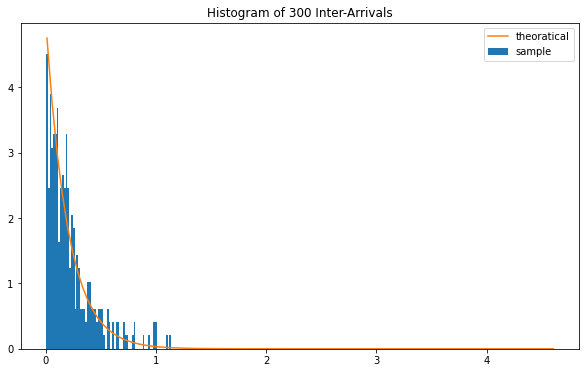

In [5]:
interarrivals = np.diff(np.concatenate((np.zeros(1), arrivals)))
plt.figure(figsize=(10, 6))
plt.hist(interarrivals, bins=70, density=True, label='sample')

rv = spst.expon()
x = np.linspace(rv.ppf(0.01), rv.ppf(0.99), 100)
plt.plot(x, spst.expon.pdf(x, scale=1/lmbda), label='theoratical')
plt.title('Histogram of %0.f Inter-Arrivals' % len(interarrivals))
plt.legend()

##Q2. [10 points]


Assume the process is a nonhomogenous Poisson process with arrival rate follows 

$\lambda(t)=exp(-t^{0.5}+2t), 0\leq t<5$



* Use the **thinning method** to simulate the arrival process from $t=0$ to $5$ at the same time. The generation of the proposals and the sampling should be done based on NumPy arrays. No loops or list comprehensions are allowed in this question. [Hint: Generate the arrivals from a homogeneous process at the same time, compute the acceptance rate of all the proposed arrivals at the same time, determine acceptance/rejection  of all the proposed arrivals at the same time]

* Report the number of arrivals for the simulation.

* Plot the sample distribution of the arrival times. 


In [6]:
t = np.linspace(0, 5, 1000)
lambda_func = np.exp(-t**0.5 + 2*t)
max_lambda = max(lambda_func)

def generatePoiProcess_FixedTime(lmbda, T=100):
  n = np.random.poisson(lam=T * lmbda, size=1)
  arrivals = np.random.uniform(0, T, size=n)
  arrivals = np.sort(arrivals)
  return arrivals

arrivals = generatePoiProcess_FixedTime(lmbda=max_lambda, T=5)
print('original simulation:', len(arrivals))


accept_rate = np.exp(-arrivals**0.5 + 2*arrivals) / max_lambda
mask = accept_rate > np.random.rand(len(accept_rate))
arrivals = arrivals[mask]
print('final simulation: ', len(arrivals))

# plt.plot(t, lambda_func)

original simulation: 11720
final simulation:  1360


Text(0.5, 1.0, 'Distribution of The Arrival Time')

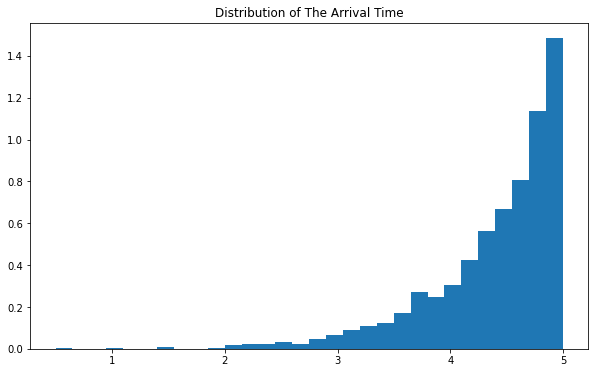

In [10]:
plt.figure(figsize=(10, 6))
plt.hist(arrivals, density=True, bins=30)
plt.title('Distribution of The Arrival Time')

#Exercise 2 [45 Points]


Assume the process is a nonhomogenous Poisson process with the following arrival rate:

$\lambda(t)=50*(sin(2*\pi* t)+2)$

The unit of time is day.

$sin(t)$ is  `sympy.sin(t)` is `simpy` and `np.sin(t)` in `numpy`. 
 

##Q1. [15 points]

* Plot the arrival rate between $t=0$ and $t=5$. 

* Create a function. Inside the function, use the **thinning method** to return the arrival time of the first 500 arrivals.  

* Run the function 100 times, plot the distribution of the arrival time of the 500th customer.  


In [11]:
t = np.linspace(0, 5, 1000)
lambda_func = 50 * (np.sin(2 * np.pi * t) + 2)
max_lambda = max(lambda_func)
max_lambda

149.99993819142986

In [19]:
def thinning(max_lambda, N):
  t = -1/max_lambda * np.log(np.random.rand())
  arrivals = []

  while len(arrivals) < N:
    if np.random.rand() < 50 * (np.sin(2*np.pi*t) + 2) / max_lambda:
      arrivals.append(t)
    t += -1/max_lambda * np.log(np.random.rand())
  return arrivals

arr = thinning(max_lambda, 500)
print(len(arr), arr[-1])

500 4.775194900239032


(array([0.27356921, 0.        , 1.09427684, 0.82070763, 0.54713842,
        0.        , 0.54713842, 0.82070763, 0.        , 0.82070763,
        0.82070763, 0.54713842, 1.36784605, 0.54713842, 1.91498447,
        0.82070763, 1.36784605, 1.91498447, 2.46212288, 2.73569209,
        1.91498447, 1.64141526, 1.36784605, 0.54713842, 1.09427684,
        0.54713842, 0.27356921, 0.        , 0.        , 0.54713842]),
 array([4.33516806, 4.37172188, 4.40827571, 4.44482953, 4.48138335,
        4.51793717, 4.55449099, 4.59104481, 4.62759863, 4.66415246,
        4.70070628, 4.7372601 , 4.77381392, 4.81036774, 4.84692156,
        4.88347538, 4.9200292 , 4.95658303, 4.99313685, 5.02969067,
        5.06624449, 5.10279831, 5.13935213, 5.17590595, 5.21245978,
        5.2490136 , 5.28556742, 5.32212124, 5.35867506, 5.39522888,
        5.4317827 ]),
 <a list of 30 Patch objects>)

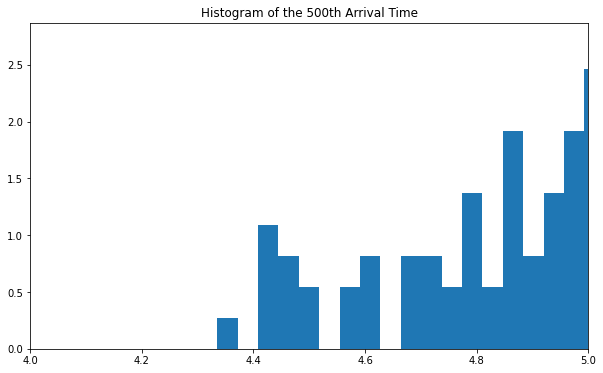

In [21]:
lastArrival = [thinning(max_lambda, 500)[-1] for _ in range(100)]
plt.figure(figsize=(10, 6))
plt.title('Histogram of the 500th Arrival Time')
plt.xlim(4, 5)
plt.hist(lastArrival, bins=30, density=True)

##Q2. [15 points]


* Generate the arrival time of the customers between 0 and 2 using ordered statistics method. [the inverse CDF does not have a closed-form solution. use numerical evaluation instead]
* Plot the sample distribution of the arrival times and the corresponding theoretical distribution in the same graph.

In [23]:
def Ex_arrivals(T):
    t = sympy.Symbol("t")
    lm_func = 50 * (sympy.sin(2 * sympy.pi * t) + 2)
    return float(sympy.integrate(lm_func, (t, 0, T)))

def N_arrivals(T):
    return np.random.poisson(Ex_arrivals(T))

N_arrivals(T = 2)

199

In [24]:
def sympy_invcdf(T):
  N = N_arrivals(T = 2)

  t = sympy.Symbol("t")
  lm_func = 50 * (sympy.sin(2 * sympy.pi * t) + 2)
  pdf = lm_func / Ex_arrivals(T)
  cdf = sympy.integrate(pdf, (t, 0, t))
  
  expression = sympy.lambdify(t, cdf, "numpy")
  arrivals = pynverse.inversefunc(expression, np.random.rand(N), (0, T))
  return np.sort(arrivals)

arrivals = sympy_invcdf(2)

Text(0.5, 1.0, 'Arrival Time from 0 and 2')

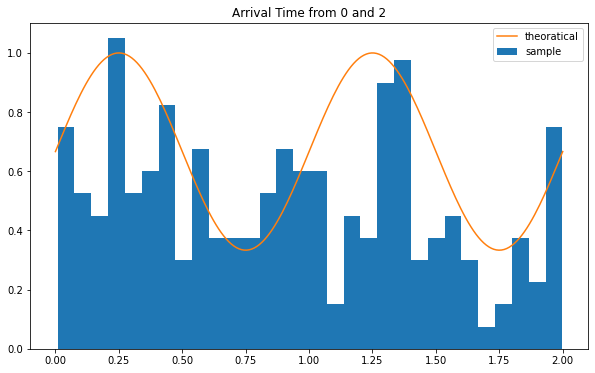

In [25]:
plt.figure(figsize=(10, 6))
plt.hist(arrivals, density=True, label='sample', bins=30)
x = np.linspace(0, 2, 200)
plt.plot(x, 50 * (np.sin(2 * np.pi * x) + 2)/max_lambda, label='theoratical')
plt.legend()
plt.title('Arrival Time from 0 and 2')

##Q3. [15 points]

Upon arrival, each customer will decide whether to order a product.

The willingness to pay of a customer arrived between 0 and 2 follows:

$w= 5-t+\epsilon$

where $t$ is the arrival time of this customer and $\epsilon$ is a random sample from a normal distribution with mean=0 and standard deviation=$t$. Again, $t$ is the arrival time of the customer. [In other words, later arrivals will tend to have a lower willingness to pay. Also, the uncertainty in the willingness to pay becomes higher for later arrivals.]

The product is priced at $x$ for all customers. If $w$ of a customer is higher than the price $x$, the customers will order the product for $x$. The company will generate a profit of $x-1$ from this customer. Otherwise, the customer will not order the product. The company will not generate profit from this customer. 

* Construct a function. This function returns the total profit generated from the customers arrived between 0 and 2 when the product is priced at $x$ for every customer based on **one round of simulation**. 
* Construct a second function. Inside this function, computes the average total profit generated from the customers arrived between 0 and 2 when the product is priced at $x$ for every customer based on **50 rounds of simulation**.
* Plot the relationship between $x$ and the average total profit from the customers arrived between 0 and 2 for $x=3, 3.1, 3.2, ..., 4.5$.

In [26]:
t = np.linspace(0, 5, 1000)
lambda_func = 50 * (np.sin(2 * np.pi * t) + 2)
max_lambda = max(lambda_func)


def Profit_sample(x, max_lambda, T=2):
  inter_arrival = -1 / max_lambda * np.log(np.random.rand())
  t = inter_arrival
  profit = 0

  while t < T:
    if np.random.rand() < (50 * (np.sin(2 * np.pi * t) + 2))/max_lambda:
      # this arrival is accepted
      error = spst.norm(loc=0, scale=t).rvs(size=1)
      willing = 5 - t + error
      if willing > x:
        profit += x - 1
      
    t += -1 / max_lambda * np.log(np.random.rand())
  return  profit

def Profit_sample_mean(x, max_lambda):
  avg = np.mean([Profit_sample(x, max_lambda) for _ in range(50)])
  return avg

In [27]:
x = np.arange(3, 4.6, 0.1)
sample = [Profit_sample_mean(i, max_lambda) for i in x]

Text(0, 0.5, 'profit ($)')

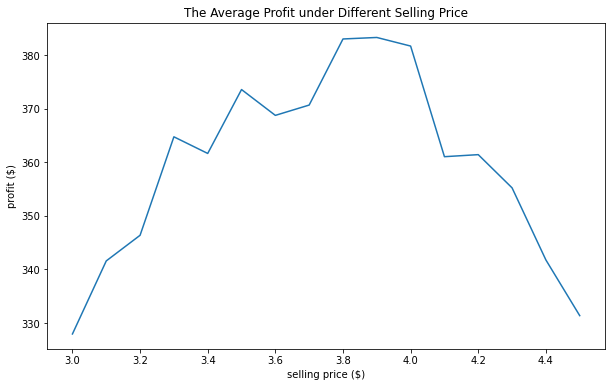

In [28]:
plt.figure(figsize=(10, 6))
plt.title('The Average Profit under Different Selling Price')
plt.plot(x, sample)
plt.xlabel('selling price ($)')
plt.ylabel('profit ($)')

# Exercise 3 [15 Points]

Let's model the arrival of two types of customers arriving at a store. Type 1 customers arrive following a Poisson process with ($\lambda=2$). Type 2 customers arrive following a non-homogeneous Poisson process with ($\lambda=2t$).




## Q1. [15 points]
* Simulate the system using `simpy` until T=2. Print out the arrival time of each customer and which type this customer is. 
> * During the simulation, please generate the inter-arrival times one by one for each process.
> * Define the arrival of type 1 customers as Process 1
> * Define the arrival of type 2 customers as Process 2

For process 2, you can pre-generate the arrival times, then compute the inter-arrival times for `env.timeout()` in Process 2. 


In [29]:
def typeOne(lmbda):
  lm = lmbda
  while True:
    t = -1 / lm * np.log(np.random.rand())
    arrival = env.timeout(t)
    yield arrival
    print(env.now, 1)


def typeTwo():
  max_lambda = 4
  n = np.random.poisson(lam=2 * max_lambda, size=1)
  inter_arrival = np.sort(np.random.uniform(0, 2, size=n))
  inter_arrival = np.concatenate((np.zeros(1), inter_arrival))
  inter_arrival = np.diff(inter_arrival)
  for i in inter_arrival:
    arrival = env.timeout(i)
    yield arrival
    print(env.now, 2)


In [32]:
env = simpy.Environment()
p1 = env.process(typeOne(2))
p2 = env.process(typeTwo())
env.run(until=2)


0.06497269423506395 1
0.06703591412843513 2
0.28719392161210344 1
0.44332499410934245 2
0.47970048515337904 2
0.920690741742728 1
1.149638699993295 2
1.2125173765477497 2
1.2615204526895634 2
1.508053471515301 2
1.768154068693536 2
